In [16]:
import numpy as np
import pandas as pd
import requests
resp_jabar = requests.get('https://storage.googleapis.com/dqlab-dataset/prov_detail_JAWA_BARAT.json', verify=False)
cov_jabar_raw = resp_jabar.json()

cov_jabar = pd.DataFrame(cov_jabar_raw['list_perkembangan'])
print('Info cov_jabar:\n', cov_jabar.info())
print('\nLima data teratas cov_jabar:\n', cov_jabar.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785 entries, 0 to 784
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   tanggal                       785 non-null    int64
 1   KASUS                         785 non-null    int64
 2   MENINGGAL                     785 non-null    int64
 3   SEMBUH                        785 non-null    int64
 4   DIRAWAT_OR_ISOLASI            785 non-null    int64
 5   AKUMULASI_KASUS               785 non-null    int64
 6   AKUMULASI_SEMBUH              785 non-null    int64
 7   AKUMULASI_MENINGGAL           785 non-null    int64
 8   AKUMULASI_DIRAWAT_OR_ISOLASI  785 non-null    int64
dtypes: int64(9)
memory usage: 55.3 KB
Info cov_jabar:
 None

Lima data teratas cov_jabar:
          tanggal  KASUS  MENINGGAL  SEMBUH  DIRAWAT_OR_ISOLASI  \
0  1583193600000      1          1       0                   0   
1  1583280000000      1          0       0   

/Users/macfahry/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host 'storage.googleapis.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Setelah mengekstrak dan mengamati cov_jabar, Anda menemukan beberapa kejanggalan pada data tersebut. Diantaranya adalah kejanggalan data pada kolom tanggal dan format penulisan kolom yang tidak konsisten. Sekarang Anda akan mencoba melakukan beberapa tahapan untuk menjinakan data tersebut sehingga dapat diolah dan dianalisis dengan lebih mudah.

Ada beberapa tahapan yang akan Anda lakukan untuk menjinakan data cov_jabar, yaitu:

Menghapus kolom DIRAWAT_OR_ISOLASI dan semua kolom yang berisi nilai kumulatif
Merubah format penulisan semua kolom menjadi huruf kecil
Mengganti nama kolom kasus menjadi kasus_baru
Memperbaiki tipe data pada kolom tanggal menggunakan pd.to_datetime
Lengkapilah baris kode berikut untuk melakukan menjinakan data sesuai dengan tahapan yang telah Anda rencanakan! Anda akan menggunakan teknik chaining pada dataframe. Simpan hasil pengolahan Anda dengan nama cov_jabar_tidy.

After extracting and observing cov_jabar, you find some irregularities in the data. Among them are data irregularities in the date column and inconsistent column writing format. Now you will try to do some steps to tame the data so it can be processed and analysed more easily.

There are several steps you will do to tame cov_jabar data, namely:

Delete the DIRAWAT_OR_ISOLATION column and all columns that contain cumulative values
Change the writing format of all columns to lowercase letters
Rename the case column to kasus_baru
Fix the data type in the date column using pd.to_datetime
Complete the following lines of code to tame the data according to the steps you have planned! You will use the chaining technique on the dataframe. Save your result with the name cov_jabar_tidy.

In [17]:
cov_jabar_tidy = (cov_jabar.drop(columns=[item for item in cov_jabar.columns
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('DIRAWAT')])
                           .rename(columns=str.lower)
                           .rename(columns={'kasus': 'kasus_baru'})
                  )
cov_jabar_tidy['tanggal'] = pd.to_datetime(cov_jabar_tidy['tanggal']*1e6, unit='ns')
print('Lima data teratas:\n', cov_jabar_tidy.head())

Lima data teratas:
      tanggal  kasus_baru  meninggal  sembuh
0 2020-03-03           1          1       0
1 2020-03-04           1          0       0
2 2020-03-05           1          0       0
3 2020-03-06           1          0       0
4 2020-03-07           0          0       0


Berdasarkan templat tersebut, komponen utama untuk membuat visualisasi antara lain adalah tabel data, kolom data, serta bentuk geometri untuk mempresentasikan data. Sebagai contoh untuk membuat scatter-plot yang diperlukan adalah bentuk geometri titik (.scatter()), line-chart memerlukan geometri garis (.plot()), sedangkan bar-chart memerlukan bentuk geometri batang atau kolom (.bar()).

Lengkapi baris kode berikut untuk membuat bar-chart jumlah kasus baru harian COVID-19 di Jawa Barat menggunakan data cov_jabar_tidy! Pergunakan kolom tanggal sebagai sumbu-x.

Based on these templates, the main components for creating visualisations include data tables, data columns, and geometric shapes to represent the data. For example, to create a scatter-plot, a point geometry (.scatter()) is required, a line-chart requires a line geometry (.plot()), while a bar-chart requires a bar or column geometry (.bar()).

Complete the following lines of code to create a bar-chart of the daily number of new cases of COVID-19 in West Java using cov_jabar_tidy data! Use the date column as the x-axis.

<Figure size 640x480 with 0 Axes>

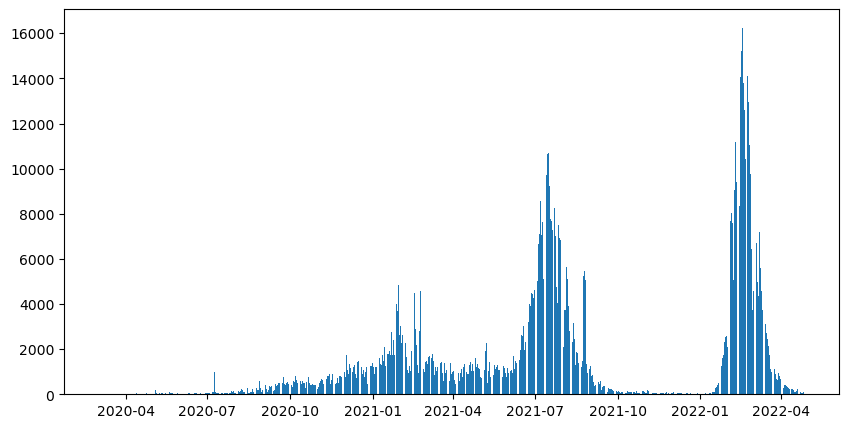

In [18]:
import matplotlib.pyplot as plt

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='kasus_baru')
plt.show()

Kostumisasi chart 
Anda telah berhasil membuat bar-chart yang diminta. Namun grafik tersebut belum memiliki informasi yang jelas serta cenderung membosankan untuk dilihat. Sekarang silakan buat kembali grafik tersebut dengan menggunakan baris kode yang telah dimodifikasi berikut:

Chart customisation 
You have successfully created the requested bar-chart. However, the chart does not have clear information and tends to be boring to look at. Now please recreate the chart by using the following modified lines of code:

/var/folders/vg/q6f_fyhd1q34xxkcqh260zdh0000gn/T/ipykernel_53465/4238932847.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation=90)


<Figure size 640x480 with 0 Axes>

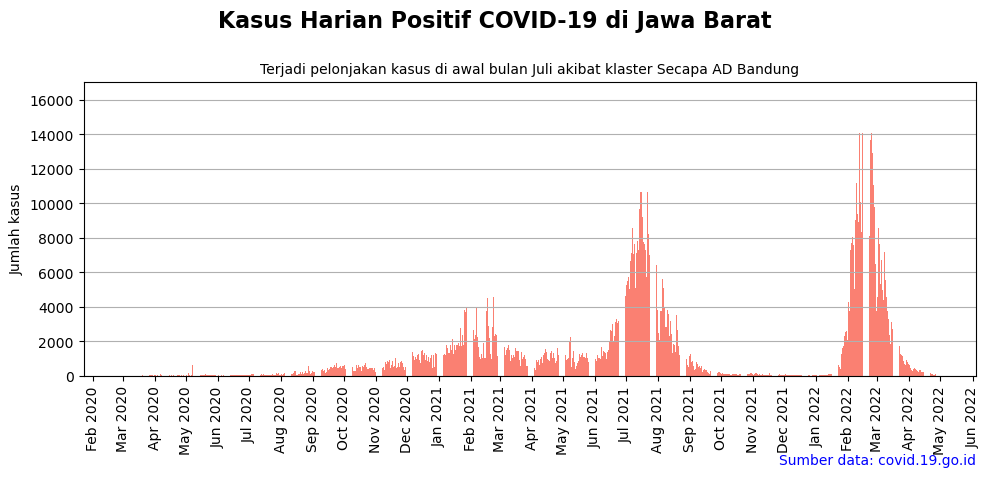

In [19]:
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='kasus_baru', color='salmon')
fig.suptitle('Kasus Harian Positif COVID-19 di Jawa Barat', 
             y=1.00, fontsize=16, fontweight='bold', ha='center')
ax.set_title('Terjadi pelonjakan kasus di awal bulan Juli akibat klaster Secapa AD Bandung',
             fontsize=10)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

Grafik untuk Kasus Sembuh
Sekarang buatlah grafik serupa dengan menggunakan data kasus sembuh menggunakan warna olivedrab!


Graph for Cured Cases
Now make a similar graph using the cured case data using olivedrab colours!

/var/folders/vg/q6f_fyhd1q34xxkcqh260zdh0000gn/T/ipykernel_53465/3334916305.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation=90)


<Figure size 640x480 with 0 Axes>

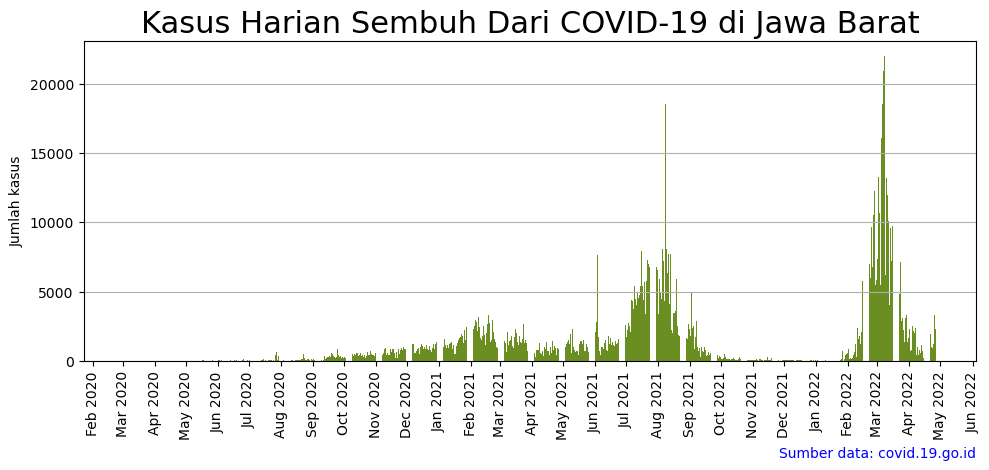

In [20]:
plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='sembuh', color='olivedrab')
ax.set_title('Kasus Harian Sembuh Dari COVID-19 di Jawa Barat',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

Grafik untuk Kasus Meninggal
Sekarang buatlah grafik serupa dengan menggunakan data kasus meninggal menggunakan warna slategrey!

Graph for Death Cases
Now create a similar graph using the death case data using slategrey colours!

/var/folders/vg/q6f_fyhd1q34xxkcqh260zdh0000gn/T/ipykernel_53465/803178015.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation=90)


<Figure size 640x480 with 0 Axes>

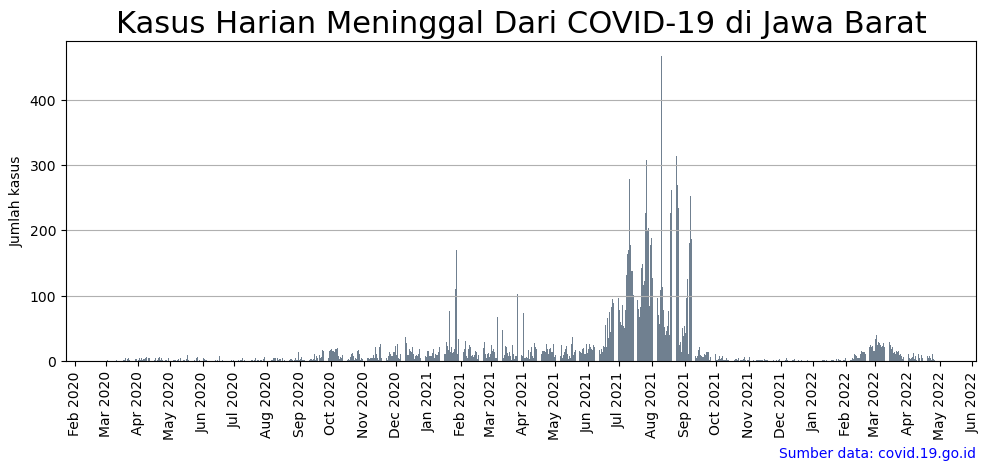

In [21]:
plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='meninggal', color='slategrey')
ax.set_title('Kasus Harian Meninggal Dari COVID-19 di Jawa Barat',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

Setelah mengamati grafik perkembangan kasus Anda menyadari bahwa terjadi fluktuasi pertambahan kasus harian. Dilandasi hal tersebut Anda kemudian ingin mencoba mengamati bagaimana perkembangan kasus dalam rentang waktu pekanan. Bagaimanakah caranya?

Anda dapat dengan mudah mengerjakannya Anda sudah dibantu melalui predefined code, yaitu set terlebih dahulu kolom tanggal pada cov_jabar_tidy sebagai index. Kemudian terapkan method pada time series di pandas, resampling per pekan dan gunakan agregasi penjumlahan. Adapun yang akan digunakan untuk mengekstrak informasi pekan dalam satu tahun adalah weekofyear dan year untuk tahun.

Lengkapilah baris kode berikut untuk menghitung pertambahan kasus pekanan dan simpanlah hasilnya sebagai cov_jabar_pekanan! Anda juga diminta untuk menggunakan method info() dan .head() untuk melakukan inspeksi data.

After observing the case progression graph you realise that there are fluctuations in daily case growth. With this in mind, you then want to try to observe how cases progress on a weekly basis. How can you do this?

You can easily do it. You have been helped through predefined code, which is to first set the date column in cov_jabar_tidy as an index. Then apply the method to the time series in pandas, resampling per week and using summation aggregation. The ones that will be used to extract the week of the year information are weekofyear and year for the year.

Complete the following lines of code to calculate the pressure case increment and save the result as cov_algebra_pressure! You are also required to use the info() and .head() methods to inspect the data.

In [22]:
cov_jabar_pekanan = (cov_jabar_tidy.set_index('tanggal')['kasus_baru']
                                   .resample('W')
					 			   .sum()
                                   .reset_index()
                                   .rename(columns={'kasus_baru': 'jumlah'})
                    )
cov_jabar_pekanan['tahun'] = cov_jabar_pekanan['tanggal'].apply(lambda x: x.year)
cov_jabar_pekanan['pekan_ke'] =cov_jabar_pekanan['tanggal'].apply(lambda x: x.weekofyear)
cov_jabar_pekanan = cov_jabar_pekanan[['tahun', 'pekan_ke', 'jumlah']]

print('Info cov_jabar_pekanan:')
print(cov_jabar_pekanan.info())
print('\nLima data teratas cov_jabar_pekanan:\n', cov_jabar_pekanan.head())

Info cov_jabar_pekanan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   tahun     113 non-null    int64
 1   pekan_ke  113 non-null    int64
 2   jumlah    113 non-null    int64
dtypes: int64(3)
memory usage: 2.8 KB
None

Lima data teratas cov_jabar_pekanan:
    tahun  pekan_ke  jumlah
0   2020        10       4
1   2020        11       5
2   2020        12      44
3   2020        13      80
4   2020        14      89


Menjawab Pertanyaan
Pertanyaan baru muncul di benak Anda setelah melakukan inspeksi terhadap data cov_jabar_pekanan tersebut: "Apakah pekan ini lebih baik dari pekan kemarin?"

Demi menjawab hal tersebut Anda melakukan kalkulasi sederhana dengan tahapan berikut:

Membuat kolom baru yang berisi jumlah kasus baru dalam satu pekan sebelumnya. Kolom ini diberi nama jumlah_pekanlalu.
Mengganti nilai NaN pada kolom jumlah_pekanlalu dengan nilai 0
Melakukan komparasi antara kolom jumlah dengan kolom jumlah_pekanlalu. Hasil komparasi ini disimpan dalam kolom baru dengan nama lebih_baik, isinya adalah True apabila jumlah kasus baru pekan ini lebih rendah dibandingkan jumlah kasus pekan lalu
Lengkapilah baris predefined kode yang diberikan untuk mengerjakan tahapan yang telah Anda rencanakan! Anda akan menggunakan method shift() untuk membuat kolom jumlah_pekanlalu. Inspeksi hasil pekerjaan Anda dengan menggunakan head(10)!

Answering the Question
A new question comes to mind after inspecting the cov_jabar_pressure data: "Is this week better than last week?"

In order to answer that, you do a simple calculation with the following steps:

Create a new column containing the number of new cases in the previous week. This column is named jumlah_pekanlalu.
Replace the NaN value in the sum_pekanlalu column with a value of 0
Perform a comparison between the sum column and the sum_pekanlalu column. The result of this comparison is stored in a new column named better, which is True if the number of new cases this week is lower than the number of cases last week.
Complete the predefined lines of code provided to perform the steps you have planned! You will use the shift() method to create the column sum_last_week. Inspect your work using head(10)!

In [23]:
cov_jabar_pekanan['jumlah_pekanlalu'] = cov_jabar_pekanan['jumlah'].shift().replace(np.nan, 0).astype(int)
cov_jabar_pekanan['lebih_baik'] = cov_jabar_pekanan['jumlah'] < cov_jabar_pekanan['jumlah_pekanlalu']

print('Sepuluh data teratas:\n', cov_jabar_pekanan.head(10))

Sepuluh data teratas:
    tahun  pekan_ke  jumlah  jumlah_pekanlalu  lebih_baik
0   2020        10       4                 0       False
1   2020        11       5                 4       False
2   2020        12      44                 5       False
3   2020        13      80                44       False
4   2020        14      89                80       False
5   2020        15     176                89       False
6   2020        16     203               176       False
7   2020        17     136               203        True
8   2020        18     100               136        True
9   2020        19     914               100       False


<Figure size 640x480 with 0 Axes>

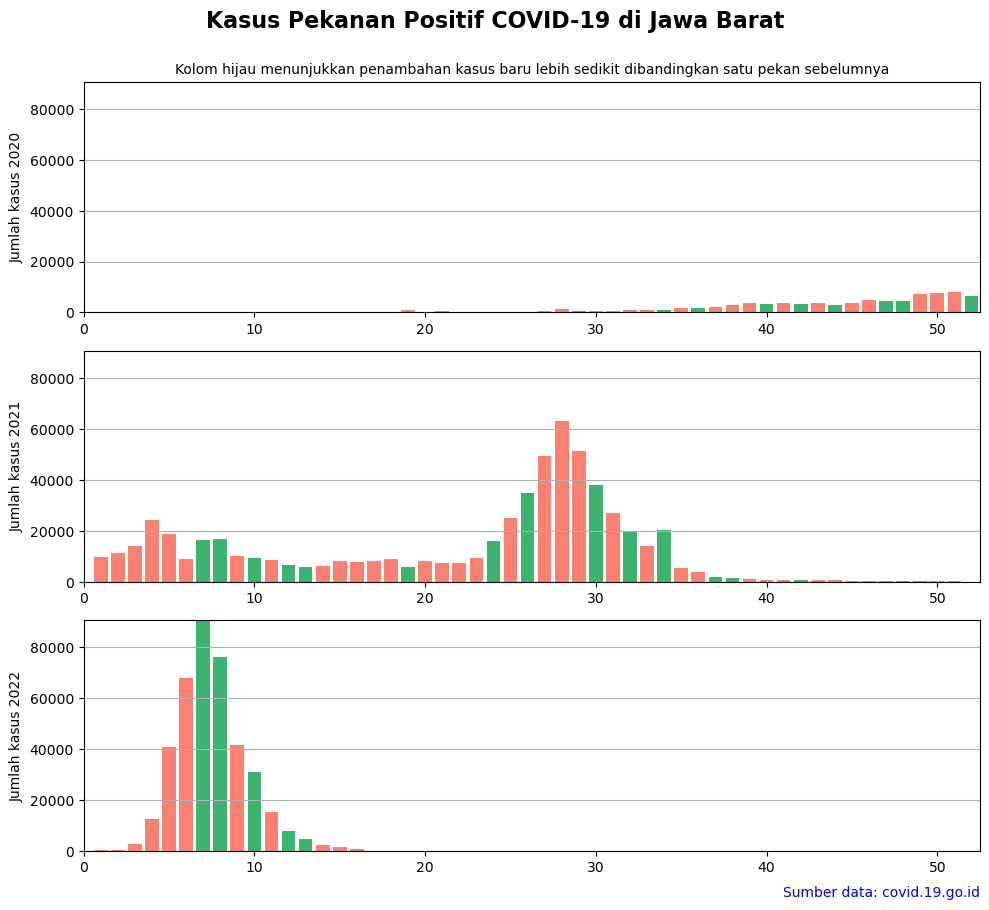

In [27]:
import matplotlib.pyplot as plt

plt.clf()
jml_tahun_terjadi_covid19 = cov_jabar_pekanan['tahun'].nunique()
tahun_terjadi_covid19 = cov_jabar_pekanan['tahun'].unique()
fig, axes = plt.subplots(nrows=jml_tahun_terjadi_covid19, figsize=(10,3*jml_tahun_terjadi_covid19))
fig.suptitle('Kasus Pekanan Positif COVID-19 di Jawa Barat', y=1.0,fontsize=16, fontweight='bold', ha='center')
for i, ax in enumerate(axes): 
	ax.bar(data=cov_jabar_pekanan.loc[cov_jabar_pekanan['tahun']==tahun_terjadi_covid19[i]], x= 'pekan_ke', height='jumlah', color=['mediumseagreen' if x is True else 'salmon' for x in cov_jabar_pekanan['lebih_baik']])
	if i == 0:
		ax.set_title('Kolom hijau menunjukkan penambahan kasus baru lebih sedikit dibandingkan satu pekan sebelumnya', fontsize=10)
	elif i == jml_tahun_terjadi_covid19-1:
		ax.text(1, -0.2, 'Sumber data: covid.19.go.id', color='blue', ha='right', transform=ax.transAxes)
	ax.set_xlim([0, 52.5])
	ax.set_ylim([0, max(cov_jabar_pekanan['jumlah'])])
	ax.set_ylabel('Jumlah kasus %d'%(tahun_terjadi_covid19[i]))
	ax.grid(axis='y')
		
plt.tight_layout()
plt.show()

Pola dan Dinamika

Ada yang akhirnya sembuh, namun tak sedikit pula yang meninggal akibat COVID-19. Sementara itu penambahan kasus baru terus terjadi di masyarakat. Hal ini mungkin memicu pertanyaan lain di diri Anda: "Hingga saat ini ada berapa kasus yang masih aktif?"

Aktif dalam artian sedang dalam perawatan atau isolasi.

Informasi ini sebenarnya telah disediakan di dalam respon API covid19.go.id yang Anda minta (https://storage.googleapis.com/dqlab-dataset/prov_detail_JAWA_BARAT.json). Namun tidak ada salahnya jika Anda mencoba menghitungnya sendiri, apakah Anda setuju?

Jumlah kasus aktif dapat dihitung dengan cara mengurangi jumlah akumulasi positif dengan jumlah akumulasi sembuh dan jumlah akumulasi meninggal. Anda dapat menggunakan method cumsum() untuk menghitung nilai akumulasi dari suatu vektor numerik. Lengkapilah baris kode berikut untuk menghitung jumlah akumulasi kasus aktif, kasus sembuh, dan kasus meninggal!

Patterns and Dynamics

Some have finally recovered, but not a few have died from COVID-19. Meanwhile, the addition of new cases continues to occur in the community. This may trigger another question in you: "How many cases are still active?"

Active in the sense of being under treatment or isolation.

This information has actually been provided in the covid19.go.id API response you requested (https://storage.googleapis.com/dqlab-dataset/prov_detail_JAWA_BARAT.json). But there is no harm if you try to calculate it yourself, do you agree?

The number of active cases can be calculated by subtracting the number of positive accumulations from the number of recovered accumulations and the number of dead accumulations. You can use the cumsum() method to calculate the accumulation value of a numeric vector. Complete the following lines of code to calculate the accumulated number of active cases, cured cases, and dead cases!

In [28]:
cov_jabar_akumulasi = cov_jabar_tidy[['tanggal']].copy()
cov_jabar_akumulasi['akumulasi_aktif'] = (cov_jabar_tidy['kasus_baru'] - cov_jabar_tidy['sembuh'] - cov_jabar_tidy['meninggal']).cumsum()
cov_jabar_akumulasi['akumulasi_sembuh'] = cov_jabar_tidy['sembuh'].cumsum()
cov_jabar_akumulasi['akumulasi_meninggal'] = cov_jabar_tidy['meninggal'].cumsum()
print(cov_jabar_akumulasi.tail())

       tanggal  akumulasi_aktif  akumulasi_sembuh  akumulasi_meninggal
780 2022-04-22            10753           1078344                15735
781 2022-04-23             9882           1079297                15737
782 2022-04-24             8709           1080519                15748
783 2022-04-25             5428           1083851                15751
784 2022-04-26             3253           1086129                15752


Membuat Line Chart

Sekarang cobalah Anda buat line-chart pola kasus aktif dengan menggunakan method plot pada ax
Akumulasi COVID19 hingga Oktober 2020



Creating a Line Chart

Now try to create a line-chart of the active case pattern using the plot method on ax
Accumulated COVID19 until October 2020

/var/folders/vg/q6f_fyhd1q34xxkcqh260zdh0000gn/T/ipykernel_53465/3186053522.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation=90)


<Figure size 640x480 with 0 Axes>

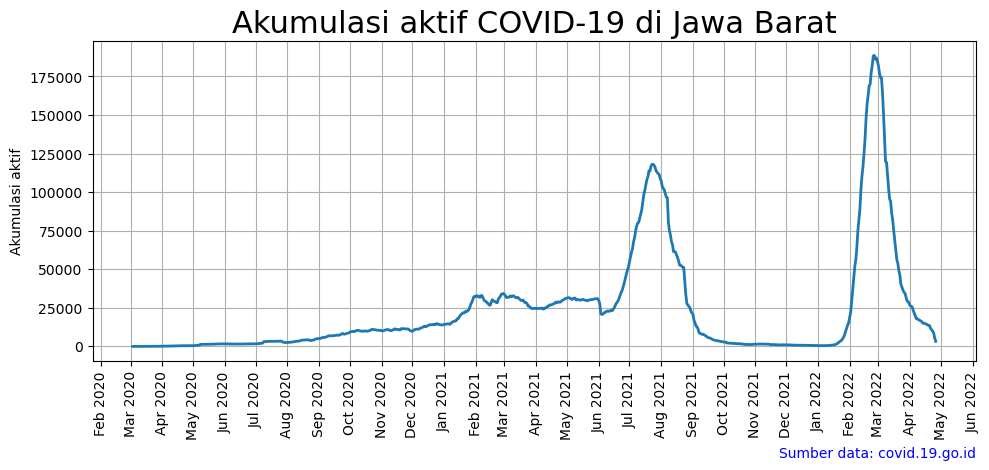

In [29]:
plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.plot('tanggal','akumulasi_aktif', data=cov_jabar_akumulasi, lw=2)

ax.set_title('Akumulasi aktif COVID-19 di Jawa Barat',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Akumulasi aktif')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid()
plt.tight_layout()
plt.show()

Sebagai penutup analisis dalam proyek ini Anda diminta untuk membuat grafik komparasi antara akumulasi kasus aktif, kasus sembuh, dan kasus meninggal.

Ada dua pilihan cara yang dapat Anda tempuh untuk membuat grafik tersebut:

Menggunakan data frame cov_jabar_akumulasi, dengan kolom bertipe datetime diset menjadi index sehingga kita memiliki time series dataframe. Kemudian kita secara langsung dapat melakukan line plot dan memilih warna garis yang sesuai untuk membedakan; atau
Menggunakan ax.plot() dan mengisikan kolom-kolom yang masing-masingnya menjadi x dan y dengan data=cov_jabar_akumulasi, dan kemudian menset warna berbeda untuk ketiga line plot.
Anda akan diminta untuk menempuh cara nomor 1. Ketik True pada konsol jika Anda setuju!

Anda hampir selesai! Pada tahap terakhir ini Anda cukup salin dan jalankan baris kode berikut di konsol untuk membuat grafik komparasi antara akumulasi kasus aktif, kasus sembuh dan kasus meninggal:

To conclude the analyses in this project you are asked to create a graph comparing the accumulation of active cases, cured cases, and dead cases.

There are two options for how you can create the graph:

Using the cov_jabar_accumulation data frame, with the datetime column set to index so that we have a time series dataframe. Then we can directly do a line plot and choose the appropriate line colour to differentiate; or
Using ax.plot() and having the columns be x and y respectively with data=cov_algebra_accumulation, and then setting different colours for the three line plots.
You will be asked to go the number 1 way. Type True on the console if you agree!

You are almost done! At this last stage you can simply copy and run the following lines of code in the console to create a comparison graph between the accumulation of active cases, cured cases and dead cases:

<Figure size 640x480 with 0 Axes>

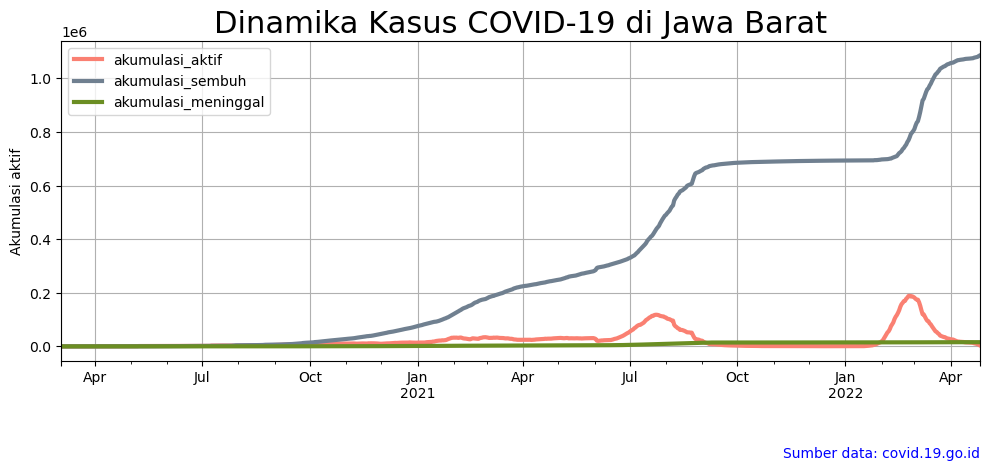

In [30]:
plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
cov_jabar_akumulasi_ts = cov_jabar_akumulasi.set_index('tanggal')
cov_jabar_akumulasi_ts.plot(kind='line', ax=ax, lw=3, 
						    color=['salmon', 'slategrey', 'olivedrab'])

ax.set_title('Dinamika Kasus COVID-19 di Jawa Barat', 
			  fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Akumulasi aktif')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue', 
		ha='right', transform=ax.transAxes)

plt.grid()
plt.tight_layout()
plt.show()